In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time

In [3]:
from dotenv import load_dotenv
import os

# Încarcă variabilele de mediu din fișierul .env
load_dotenv()

True

In [4]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [5]:

def getAllWordsFromCharArray(array):
    words = []
    for sentence in array:
        for word in sentence.split():
            words.append(word)
    return words

def getLettersFromWords(words):
    letters = []
    for word in words:
        for letter in word:
            letters.append(letter)
    return letters

def getWordsAndLettersFromImage(imagePath: str):
    img = open(imagePath, "rb")
    read_response = computervision_client.read_in_stream(
        image=img,
        mode="Printed",
        raw=True
    )
    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    # Print the detected text, line by line
    result = []
    if read_result.status == OperationStatusCodes.succeeded:
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                result.append(line.text)
    
    words = getAllWordsFromCharArray(result)
    letters = getLettersFromWords(words)

    return words, letters

print(getWordsAndLettersFromImage("Images/example1.png"))


(['This', 'is', 'a', 'handwritten', 'example', 'Write', 'as', 'good', 'as', 'you', 'can.'], ['T', 'h', 'i', 's', 'i', 's', 'a', 'h', 'a', 'n', 'd', 'w', 'r', 'i', 't', 't', 'e', 'n', 'e', 'x', 'a', 'm', 'p', 'l', 'e', 'W', 'r', 'i', 't', 'e', 'a', 's', 'g', 'o', 'o', 'd', 'a', 's', 'y', 'o', 'u', 'c', 'a', 'n', '.'])


In [6]:
def hammingDistance(array1, array2):
    count = 0
    for el1, el2 in zip(array1, array2):
        if el1 != el2:
            count += 1

    return count

def levenshteinDistance(array1, array2):
    if len(array2) == 0:
        return len(array1)
    if len(array1) == 0:
        return len(array2)
    if array1[0] == array2[0]:
        return levenshteinDistance(array1[1:],array2[1:])
    return 1 + min([levenshteinDistance(array1[1:],array2),levenshteinDistance(array1,array2[1:]),levenshteinDistance(array1[1:],array2[1:])])

def  longestCommonSubsequence(array1, array2):
    if len(array1) == 0 or len(array2) == 0:
        return 0
    if array1[-1] == array2[-1]:
        return 1 + longestCommonSubsequence(array1[:-1],array2[:-1])
    return max(longestCommonSubsequence(array1,array2[:-1]),longestCommonSubsequence(array1[:-1],array2))

In [9]:
file = open('results.csv')
for line in file.readlines():
    line = line[:-1] 
    tokens = line.split(',')
    imagePath = tokens[0]
    groundTruthWords = tokens[1:]
    groundTruthLetters = getLettersFromWords(groundTruthWords)
    wordsGoodImage,lettersGoodImage = getWordsAndLettersFromImage("Images/GoodImages/"+imagePath)
    wordsBadImage,lettersBadImage = getWordsAndLettersFromImage("Images/BadImages/"+imagePath)

    print("GoodImages/"+imagePath)
    print("Words")
    print("Hamming distance:",hammingDistance(groundTruthWords,wordsGoodImage))
    print("Levensthein distance:",levenshteinDistance(groundTruthWords,wordsGoodImage))
    print("Longest Common Subsequence:",longestCommonSubsequence(groundTruthWords,wordsGoodImage))
    print("Letters")
    print("Hamming distance:",hammingDistance(groundTruthWords,wordsGoodImage))
    print("Hamming distance:",hammingDistance(groundTruthWords,wordsGoodImage))
    print("Longest Common Subsequence:",hammingDistance(groundTruthWords,wordsGoodImage))
    print()
    print("BadImages/"+imagePath)
    print("Words")
    print("Hamming distance:",hammingDistance(groundTruthWords,wordsBadImage))
    print("Levensthein distance:",levenshteinDistance(groundTruthWords,wordsBadImage))
    print("Longest Common Subsequence:",longestCommonSubsequence(groundTruthWords,wordsBadImage))
    print("Letters")
    print("Hamming distance:",hammingDistance(groundTruthWords,wordsBadImage))
    print("Hamming distance:",hammingDistance(groundTruthWords,wordsBadImage))
    print("Longest Common Subsequence:",hammingDistance(groundTruthWords,wordsBadImage))
    print()
    print()
        
    

GoodImages/ex1.jpg
Words
Hamming distance: 0
Levensthein distance: 0
Longest Common Subsequence: 3
Letters
Hamming distance: 0
Hamming distance: 0
Longest Common Subsequence: 0

BadImages/ex1.jpg
Words
Hamming distance: 0
Levensthein distance: 3
Longest Common Subsequence: 0
Letters
Hamming distance: 0
Hamming distance: 0
Longest Common Subsequence: 0


GoodImages/ex2.jpg
Words
Hamming distance: 3
Levensthein distance: 3
Longest Common Subsequence: 5
Letters
Hamming distance: 3
Hamming distance: 3
Longest Common Subsequence: 3

BadImages/ex2.jpg
Words
Hamming distance: 3
Levensthein distance: 3
Longest Common Subsequence: 5
Letters
Hamming distance: 3
Hamming distance: 3
Longest Common Subsequence: 3


GoodImages/ex3.jpg
Words
Hamming distance: 3
Levensthein distance: 3
Longest Common Subsequence: 3
Letters
Hamming distance: 3
Hamming distance: 3
Longest Common Subsequence: 3

BadImages/ex3.jpg
Words
Hamming distance: 6
Levensthein distance: 5
Longest Common Subsequence: 2
Letters
Hamm

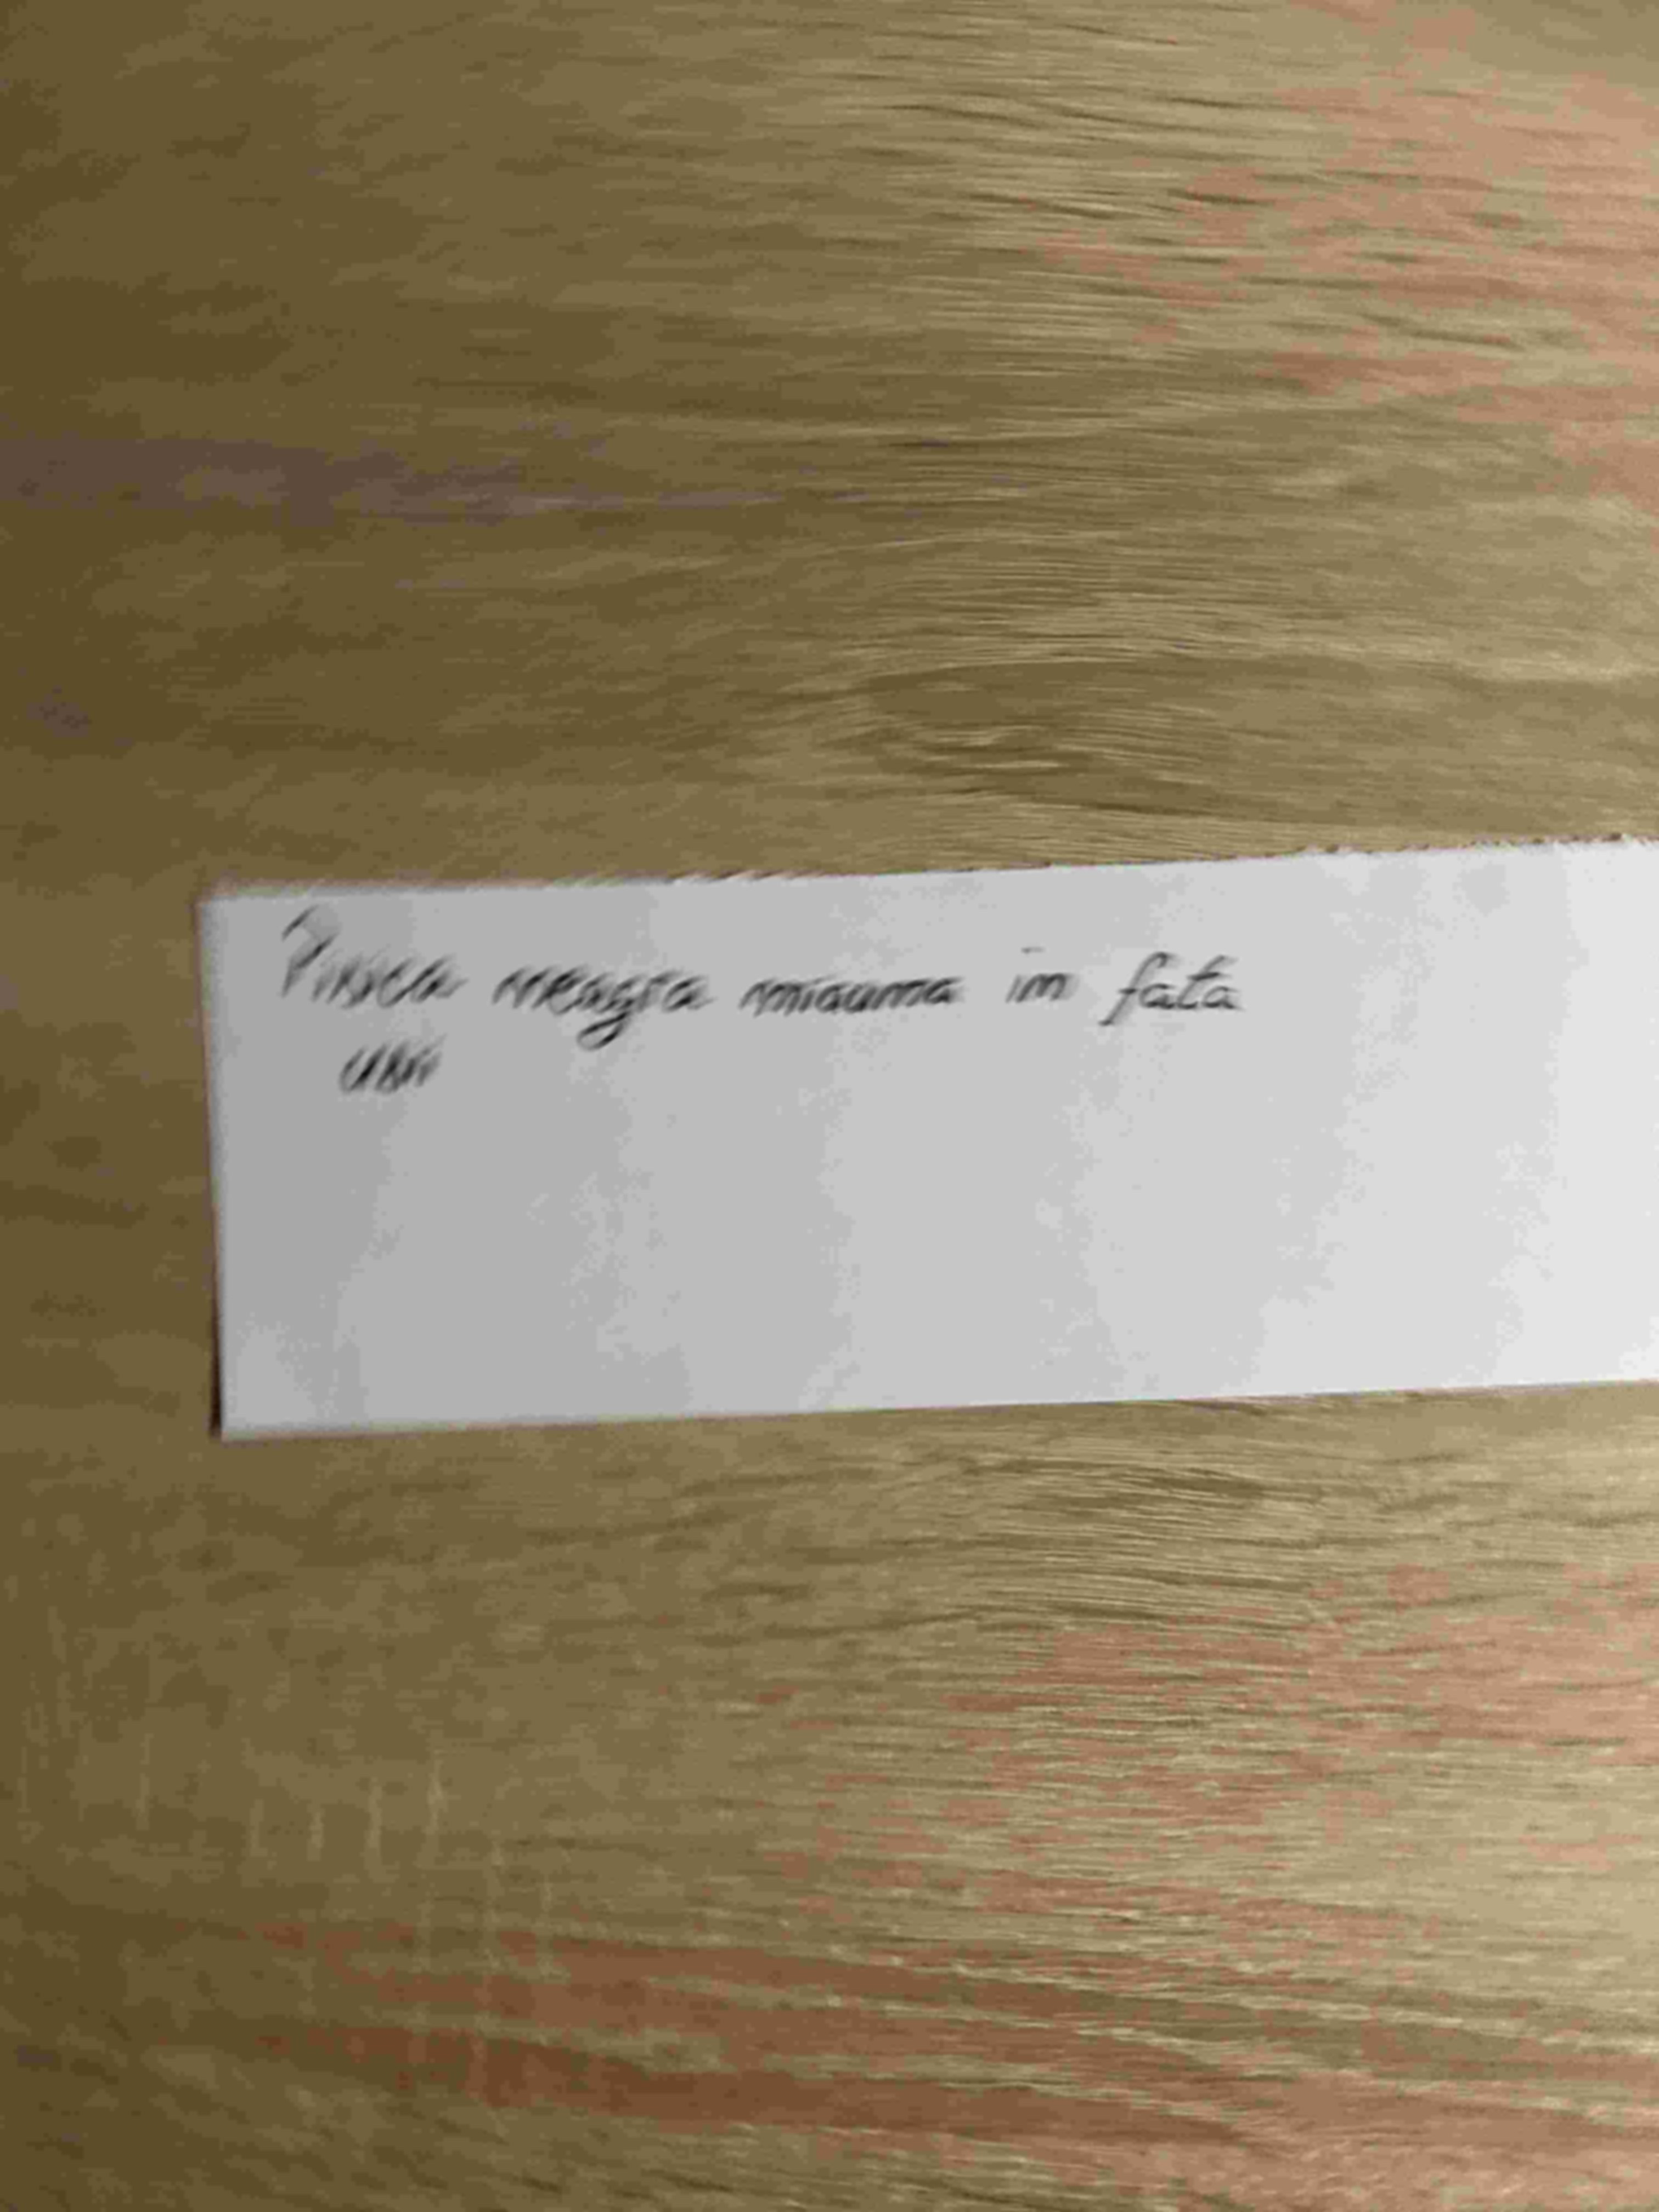

es
~
—,
~
a.

 



In [13]:
import pytesseract
from PIL import Image
from PIL import ImageFilter

# Încarcă imaginea
image = Image.open('Images/BadImages/ex3.jpg')
image = image.filter(ImageFilter.GaussianBlur(radius=2))
image.show()
# Extrage textul din imagine
extracted_text = pytesseract.image_to_string(image)

# Afișează textul extras
print(extracted_text)
